In [109]:
%matplotlib inline

# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

import yfinance as yf

# Set plotly offline
init_notebook_mode(connected=True)

def compute_drawdowns(dataframe):
    '''
    Function to compute drawdowns of a timeseries
    given a dataframe of prices
    '''
    return (dataframe / dataframe.cummax() -1) * 100

dimensions=(990, 500)

In [110]:
stoxx50 = yf.download("^STOXX50E", start="2019-12-30")[['Close']]
aex     = yf.download("^aex", start="2019-12-30")[['Close']]
sp500   = yf.download("^GSPC", start="2019-12-30")[['Close']]
ftse    = yf.download("^FTSE", start="2019-12-30")[['Close']]
dax     = yf.download("^GDAXI", start="2019-12-30")[['Close']]
omsx30  = pd.read_csv('OMSX30_2.csv', index_col='Date', parse_dates=True)[['Closingprice']]
stoxx600     = yf.download("^STOXX", start="2019-12-30")[['Close']]

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [111]:
fundos = pd.DataFrame()
fundos = stoxx50.merge(aex, how='inner', left_index=True, right_index=True)
fundos = fundos.merge(omsx30, how='inner', left_index=True, right_index=True)
fundos = fundos.merge(sp500, how='inner', left_index=True, right_index=True)
fundos = fundos.merge(ftse, how='inner', left_index=True, right_index=True)
fundos = fundos.merge(dax, how='inner', left_index=True, right_index=True)
fundos = fundos.merge(stoxx600, how='inner', left_index=True, right_index=True)

In [112]:
fundos.columns = ['stoxx50', 'aex', 'omsx30', 'sp500', 'ftse', 'dax', 'stoxx600']
fundos = (fundos/fundos.iloc[0]) * 100

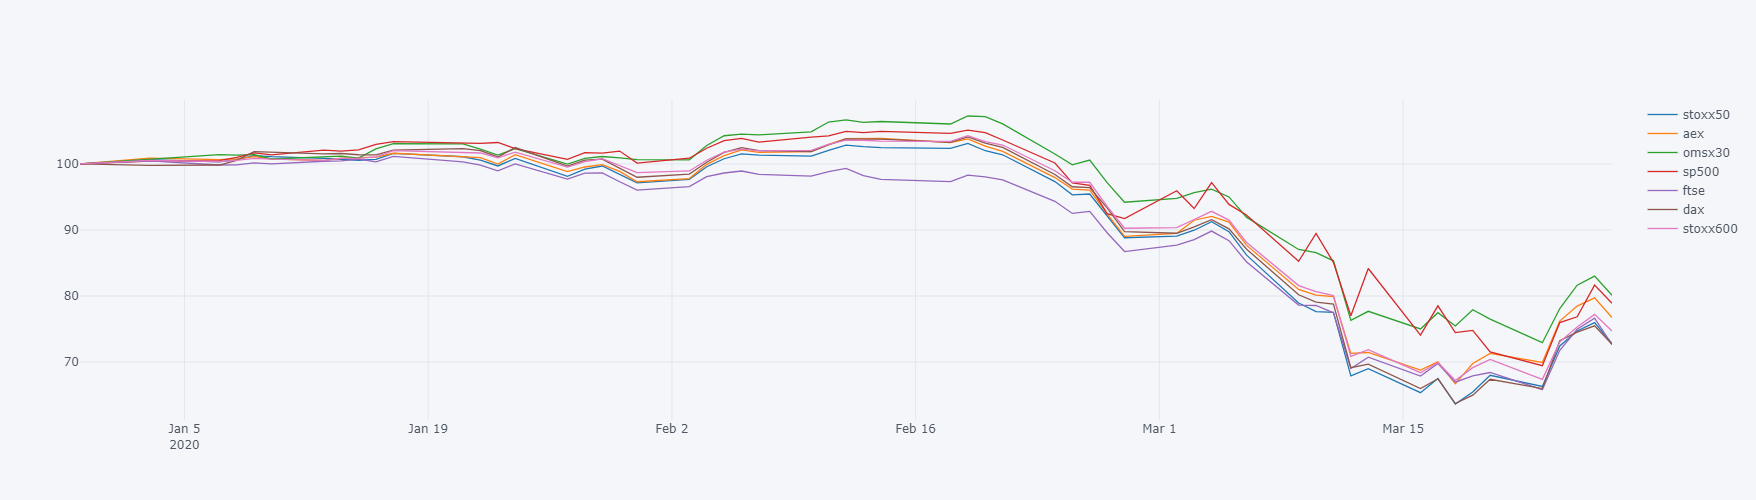

In [113]:
round(fundos, 2).iplot(dimensions=dimensions, colorscale='plotly')

In [114]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF